In [53]:
import faceted 
import seaborn as sns 
import matplotlib.pyplot as plt
import utils
import os 
import json
import numpy as np

In [109]:
utils.set_plot_configs(plt, fsize=8)
plt.rcParams['lines.markersize'] = 4

In [14]:
results_dir = utils.get_path('results')
data = results_dir + '/ZECMIP_data.json'

print("Loading in ZECMIP data from data.json... ")
with open(data) as file:
    ZECMIP = json.load(file)
    
# convert data from lists to arrays
for model in ZECMIP.keys():
    for exp in ["750", "1000", "2000"]:
        if exp in ZECMIP[model].keys():
            for var in ZECMIP[model][exp].keys():
                ZECMIP[model][exp][var] = np.array(ZECMIP[model][exp][var])

Loading in ZECMIP data from data.json... 


In [58]:
del(ZECMIP["BERN-ecs3k"])

In [79]:
EMICs = ['BERN-ecs2k', 'BERN-ecs3k', 'BERN-ecs5k', 'CLIMBER2', 'DCESS', 'IAPRAS',
         'LOVECLIM', 'MESM', 'MIROC-lite', 'PLASIM-GENIE', 'UVic']

In [80]:

tab10_colors = plt.cm.tab10.colors

full_complexity_models = [
    "ACCESS", "CanESM5", "CESM", "CNRM-ESM2-1", 
    "GFDL-ESM2M", "MIROC-ES2L", "MPIESM", "NorESM2", "UKESM1"
]

intermediate_complexity_models = [
    "BERN-ecs2k", "BERN-ecs5k", "CLIMBER2", "DCESS", 
    "IAPRAS", "LOVECLIM", "MESM", "MIROC-lite", "PLASIM-GENIE", "UVic"
]

full_complexity_colors = {model: tab10_colors[i % len(tab10_colors)] for i, model in enumerate(full_complexity_models)}
intermediate_complexity_colors = {model: tab10_colors[i % len(tab10_colors)] for i, model in enumerate(intermediate_complexity_models)}
combined_colors = {**full_complexity_colors, **intermediate_complexity_colors}

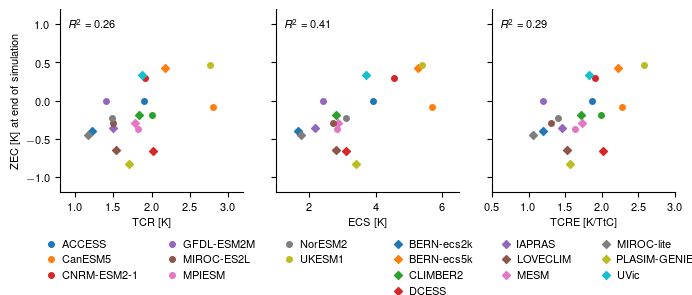

In [110]:
fig, axis = faceted.faceted(1, 3, aspect=1.0, width=7, sharex=False, left_pad=.6,
                           top_pad=.1, bottom_pad=1.1)

xs = []
ys = [] 

# First plot remains unchanged
for model in ZECMIP:
    xs.append(ZECMIP[model]["TCR"])
    ys.append(ZECMIP[model]["1000"]['ZEC_avg'][-10])
    if model in EMICs:
        marker = "D"
    else:
        marker = "o"
    axis[0].scatter(ZECMIP[model]["TCR"], ZECMIP[model]["1000"]['ZEC_avg'][-10], 
                    color=combined_colors[model], marker=marker)

axis[0].text(.05, .9, "$R^2 = $ "+str(np.round(np.corrcoef(xs, ys)[0, 1]**2, 2)), transform=axis[0].transAxes) 
axis[0].set_xlim([.8, 3.2])

# Middle plot: Construct separate legends
xs = []
ys = [] 
emic_handles = []
full_handles = []

for model in ZECMIP:
    if model != "CESM":
        if model in EMICs:
            marker = "D"
            handle = axis[1].scatter(ZECMIP[model]["ECS"], ZECMIP[model]["1000"]['ZEC_avg'][-10],
                                     color=combined_colors[model], marker=marker, label=model)
            emic_handles.append(handle)
        else:
            marker = "o"
            handle = axis[1].scatter(ZECMIP[model]["ECS"], ZECMIP[model]["1000"]['ZEC_avg'][-10],
                                     color=combined_colors[model], marker=marker, label=model)
            full_handles.append(handle)
        xs.append(ZECMIP[model]["ECS"])
        ys.append(ZECMIP[model]["1000"]['ZEC_avg'][-10])

axis[1].text(.05, .9, "$R^2 = $ "+str(np.round(np.corrcoef(xs, ys)[0, 1]**2, 2)), transform=axis[1].transAxes)  
axis[1].set_xlim([1, 6.5])
axis[1].set_ylim([-1, 1])

# Create legends for the middle plot
emic_legend = axis[1].legend(handles=emic_handles, frameon=False, loc='upper center',
                             bbox_to_anchor=(1.45, -.2), ncol=3, handletextpad=0)
axis[1].add_artist(emic_legend)  # Add the EMIC legend first

axis[1].legend(handles=full_handles,frameon=False, loc='upper center',
               bbox_to_anchor=(-.45, -.2), ncol=3, handletextpad=0)

# Third plot remains unchanged
xs = []
ys = [] 
for model in ZECMIP:
    if model in EMICs:
        marker = "D"
    else:
        marker = "o"
    axis[2].scatter(ZECMIP[model]["TCRE"], ZECMIP[model]["1000"]['ZEC_avg'][-10], color=combined_colors[model],
                    marker=marker)
    xs.append(ZECMIP[model]["TCRE"])
    ys.append(ZECMIP[model]["1000"]['ZEC_avg'][-10])
    
axis[2].text(.05, .9, "$R^2 = $ "+str(np.round(np.corrcoef(xs, ys)[0, 1]**2, 2)), transform=axis[2].transAxes)  
axis[2].set_xlim([.5, 3])

# Common settings
for ax in axis:
    # ax.axhline(0, color='grey', linestyle='dashed')
    ax.set_yticks([-1, -.5, 0, .5, 1])
    ax.set_ylim([-1.2,1.2])
axis[0].set_ylabel('ZEC [K] at end of simulation')
axis[0].set_xlabel('TCR [K]')
axis[1].set_xlabel('ECS [K]')
axis[2].set_xlabel('TCRE [K/TtC]')

sns.despine()

fig.savefig(results_dir+"/figures/sfig_metrics.pdf")